In [1]:
# pip install missingno

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as misno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("D:\Data_Science\Kaggle\Chronic_data\Dataset\kidney_disease.csv")

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Missing values intereption:
     ### Numerical, Categorical & Date Time, Mixed.
MCAR(Missing Completely at Random):
   This missingness has no any particular reason of being missed. When missing data is MCAR it means that the missing data is independent of input & output variables in a dataset.Ther e is no any pattern kin missing
   WAYS TO DELETE THE DATA
   Listwise Deletion:
       Deleting the variables with columns
   Pairwise Deletion:
        Pairwise deletion only deletes cases when one of the variables being used in the statistical method that is considered, is missing.
    
MAR(Missing at Random);
    When missing data is MAR it means that the missing data is systematically related to Observed value.Missing value has some pattern. For E.g. There is missing values of age > 45 in datasets.
    How to deal with missingness:
       Mean,Median,Mode & Multiple Imputations. 
    
MNAR(Missing not at random):
        There is pattern in missing data.When missing data is MNAR it means that the missing data is systematically related to Unobserved value.
     How to deal with msisingness:
         Need for data collection.

<AxesSubplot:>

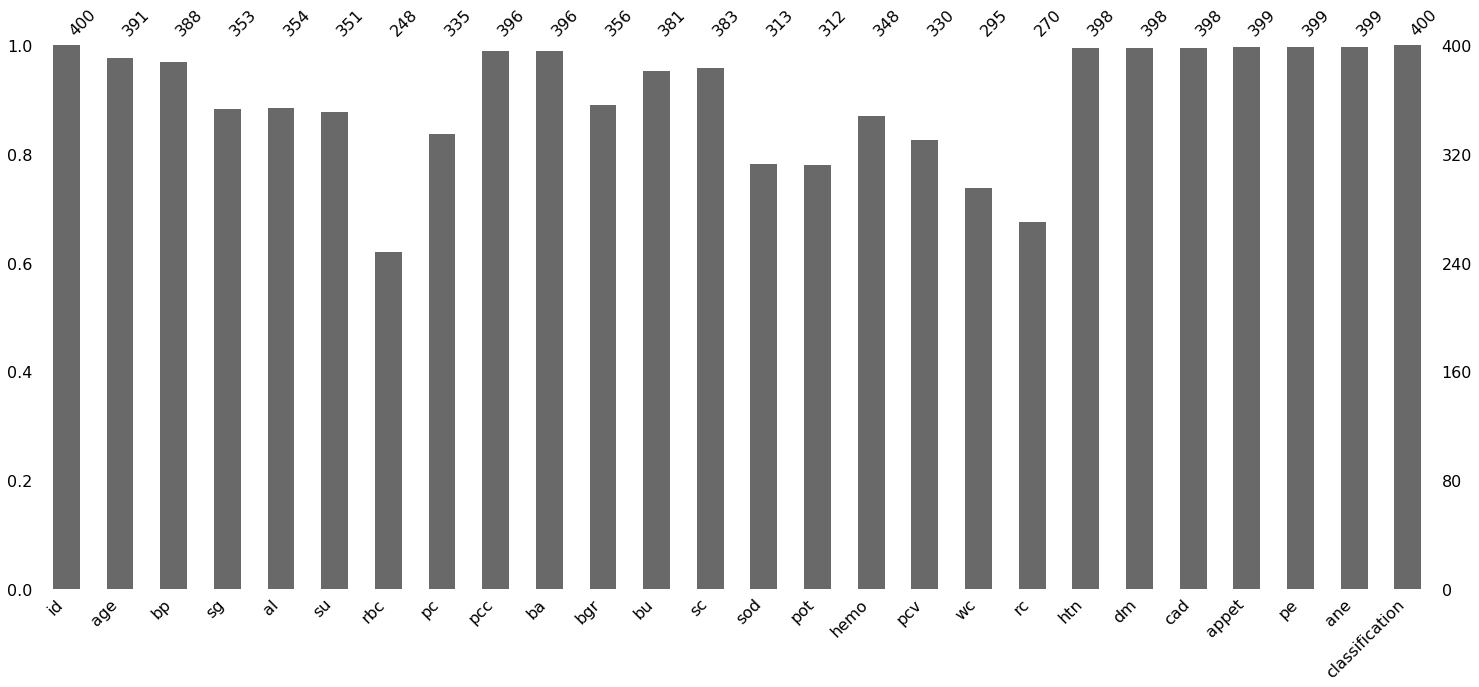

In [6]:
misno.bar(df)

##  Checking the relation with the variables using CHi-Square and Cramer's coefficient
            The Chi-Square test of independence is used to determine if there is an association between two categorical variables. A contingency table or a crosstab is used by the chi-sq. test to check for the frequency in those categories.
            The Cramer’s coefficient is a measure of association between two nominal variables, giving a value between 0 and +1.

<AxesSubplot:>

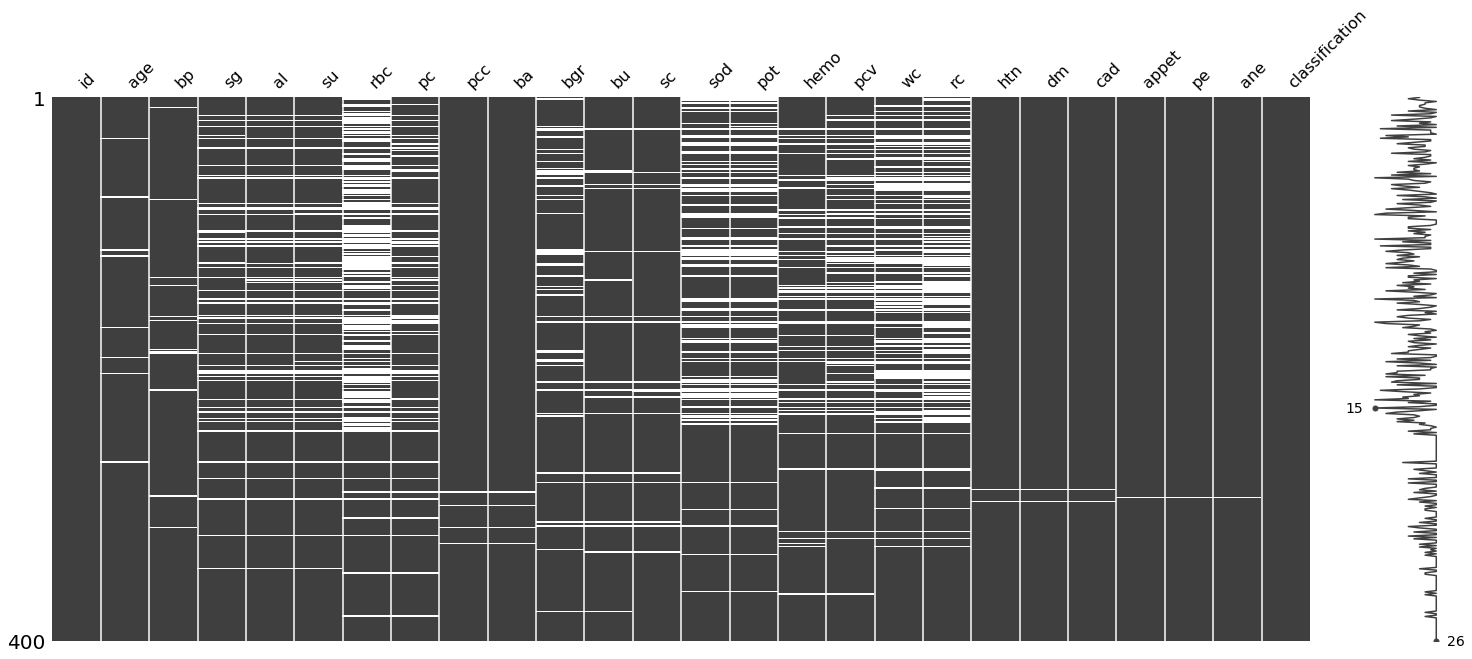

In [7]:
misno.matrix(df)

<AxesSubplot:>

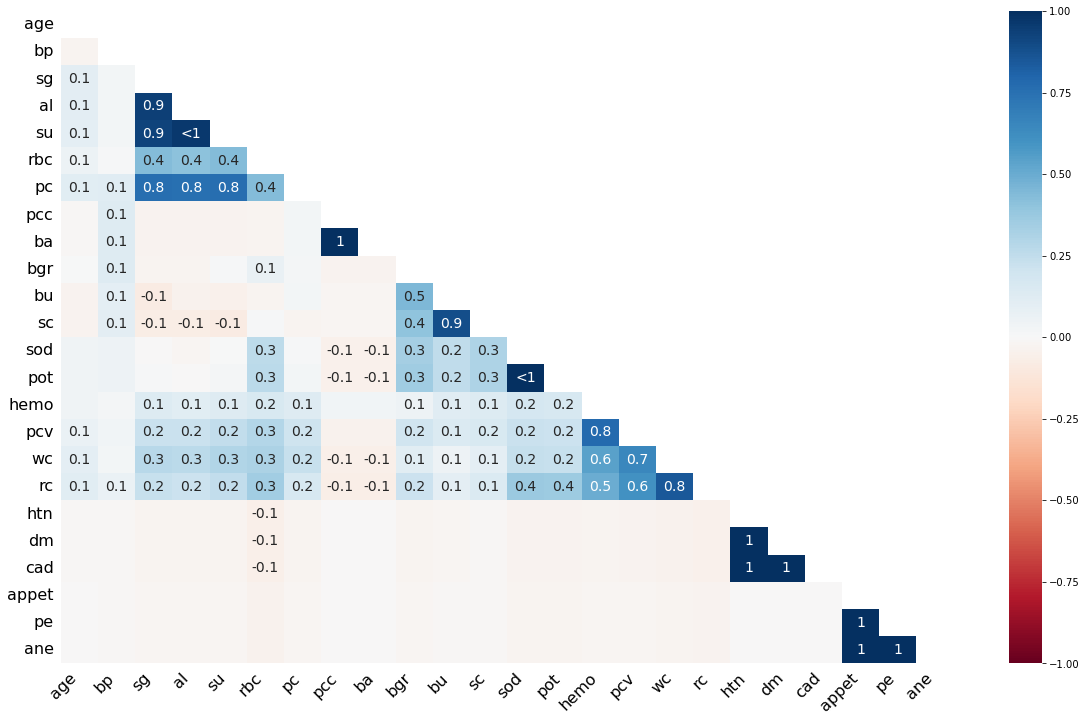

In [8]:
misno.heatmap(df)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#Converting the datatypes 
df['pcv']=pd.to_numeric(df['pcv'],errors="coerce")
df['wc']=pd.to_numeric(df['wc'],errors="coerce")
df['rc']=pd.to_numeric(df['rc'],errors="coerce")

In [11]:
###Seperating a categorical and numeric column
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']


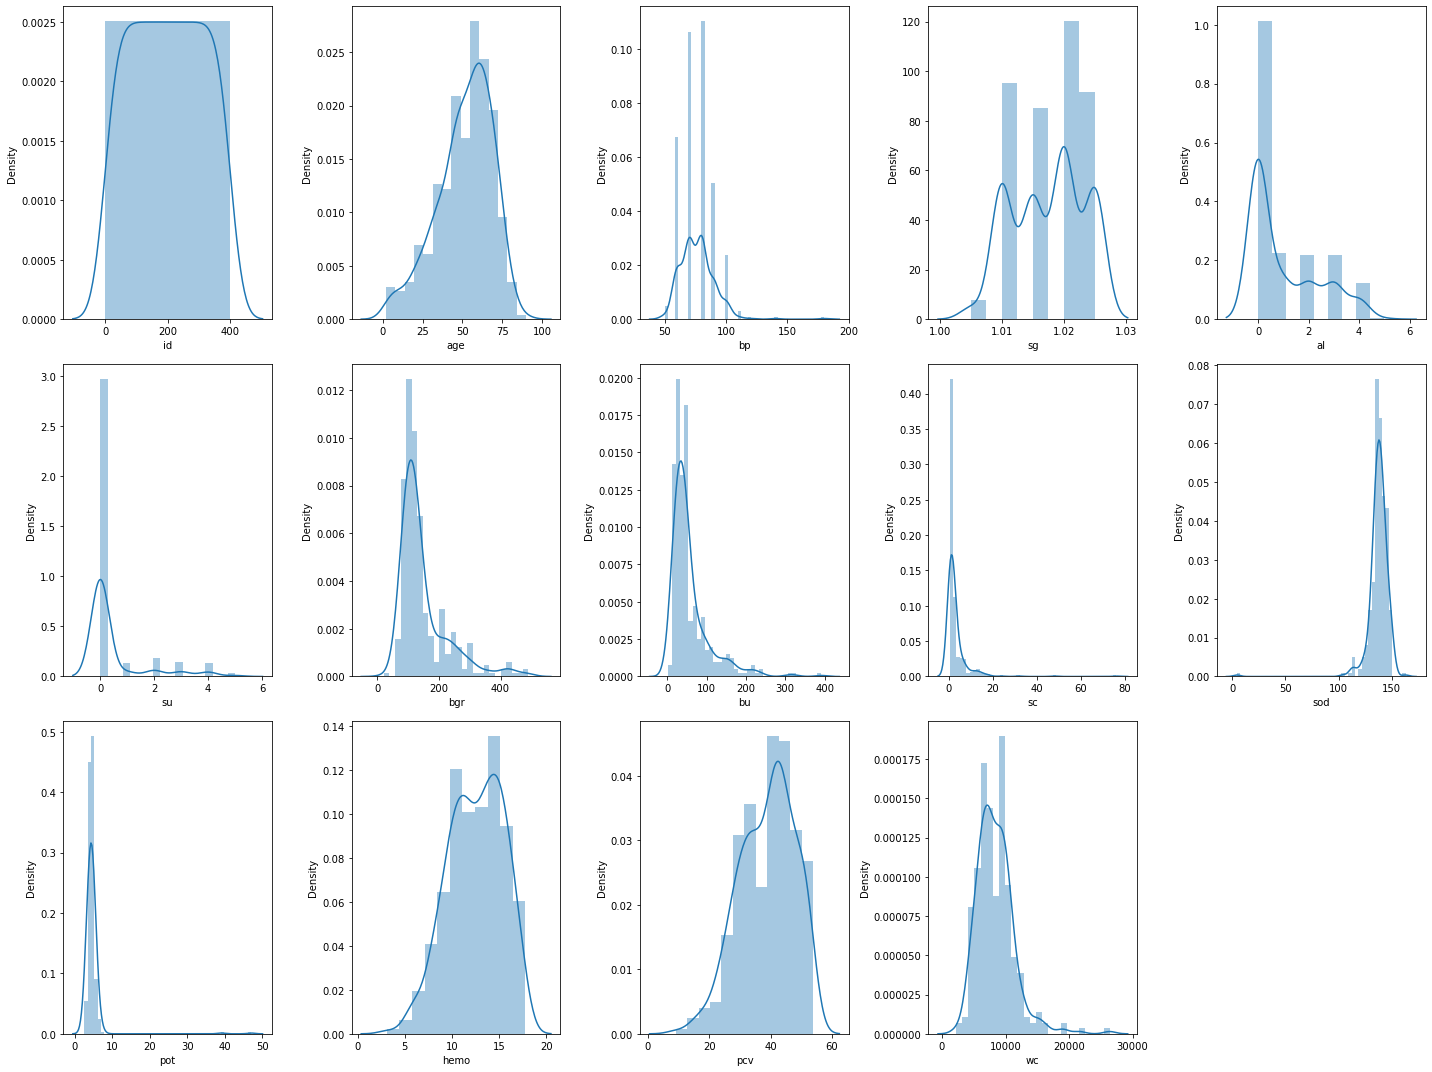

In [12]:
###plotting displot to see how the disptripution the data is 

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [13]:
for cat in cat_col:
    print(f"{cat} has {df[cat].unique()} values")
    

# for col in cat_col:
#     print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values
pc has ['normal' 'abnormal' nan] values
pcc has ['notpresent' 'present' nan] values
ba has ['notpresent' 'present' nan] values
htn has ['yes' 'no' nan] values
dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
cad has ['no' 'yes' '\tno' nan] values
appet has ['good' 'poor' nan] values
pe has ['no' 'yes' nan] values
ane has ['no' 'yes' nan] values
classification has ['ckd' 'ckd\t' 'notckd'] values


In [14]:
###Replacing the values
df["dm"].replace(to_replace={"\tno":"no","\tyes":"yes","yes":"yes"},inplace=True)
df["cad"].replace(to_replace={"\tno":"no"},inplace=True)
df["classification"].replace(to_replace={"ckd\t":"ckd","notckd":"not ckd"},inplace=True)

In [15]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [16]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [17]:
#filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] =random_sample
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

In [18]:
for col in num_col:
    random_value_imputation(col)
    

In [19]:
for cat in cat_col:
    impute_mode(cat)

In [20]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53.0,6800.0,6.1,no,no,no,good,no,no,not ckd


In [22]:
###Applying Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for cat in cat_col:
    df[cat]=le.fit_transform(df[cat])

In [23]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [25]:
X=df.loc[:,['age','sg', 'rbc','hemo','wc']]
Y=df['classification']

In [26]:
##model selection 
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feature_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feature_el_model.fit(X,Y)
feature_el_model.get_support()

array([ True, False,  True,  True,  True])

In [27]:
cols= X.columns
selected_feature = cols[feature_el_model.get_support()]

In [28]:
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))

total_features 5
total_features 4


In [29]:
X= X[selected_feature]

In [30]:
X.tail()

,age,rbc,hemo,wc
395,55.0,1,15.7,6700.0
396,42.0,1,16.5,7800.0
397,12.0,1,15.8,6600.0
398,17.0,1,14.2,7200.0
399,58.0,1,15.8,6800.0


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [33]:
X_train = sc.fit_transform(X_train)
X_train

array([[ 0.60946109,  0.33990859,  0.01135211, -0.18666627],
       [ 0.14902505,  0.33990859, -0.29959692,  0.36419018],
       [-0.25385647,  0.33990859, -0.16139735,  1.40109644],
       ...,
       [-1.63516457,  0.33990859,  0.59870027, -0.41348952],
       [-0.77184701,  0.33990859,  0.35685103, -0.3810862 ],
       [-1.98049159,  0.33990859,  0.46050071, -0.47829616]])

In [35]:
X_test = sc.transform (X_test)
X_test

array([[-1.86538258,  0.33990859, -0.36869671, -0.51069948],
       [-0.25385647,  0.33990859,  0.25320135, -0.12185963],
       [ 0.49435208, -2.94196744, -0.8523952 , -0.18666627],
       [ 0.43679757,  0.33990859, -1.81979218,  0.42899682],
       [ 1.24256063, -2.94196744, -1.16334423, -0.47829616],
       [ 0.43679757,  0.33990859, -1.88889196, -1.51520242],
       [-1.05961953,  0.33990859,  0.52960049, -0.21906959],
       [ 0.7821246 ,  0.33990859, -0.33414681,  1.10946655],
       [ 0.20657956,  0.33990859,  0.21865146, -0.5431028 ],
       [ 1.06989712,  0.33990859, -0.19594725, -0.08945631],
       [ 0.09147055, -2.94196744, -1.05969455,  1.1742732 ],
       [-1.28983754,  0.33990859,  0.39140092, -0.99674929],
       [ 1.41522414,  0.33990859, -0.8178453 ,  0.91504663],
       [ 0.72457009,  0.33990859, -0.78329541, -0.51069948],
       [-0.08119296,  0.33990859, -1.37064358,  1.53070972],
       [-0.25385647,  0.33990859, -0.99059477,  0.2345769 ],
       [-0.19630197,  0.

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score

In [37]:
models=[]
models.append(("Naive Bayes Accuracy",GaussianNB()))
models.append(("Logistics Regression Accuracy",LogisticRegression()))
models.append(("K Nearest Neighbor Accuracy",KNeighborsClassifier()))
models.append(("Random Forest Accuracy",RandomForestClassifier()))
models.append(("Decision Tree Accuracy",DecisionTreeClassifier()))

In [38]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(accuracy_score(y_test,pred))
    print('\n')

Naive Bayes Accuracy
[[26 50]
 [ 0 44]]


0.5833333333333334


Logistics Regression Accuracy
[[70  6]
 [ 7 37]]


0.8916666666666667


K Nearest Neighbor Accuracy
[[69  7]
 [ 4 40]]


0.9083333333333333


Random Forest Accuracy
[[71  5]
 [ 3 41]]


0.9333333333333333


Decision Tree Accuracy
[[67  9]
 [ 8 36]]


0.8583333333333333




In [39]:
rf=RandomForestClassifier()
rf.fit(X_train , y_train)
prediction = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
    
print(confusion_matrix(prediction,y_test))
print('\n')
print(accuracy_score(prediction,y_test))
print('\n')

[[71  2]
 [ 5 42]]


0.9416666666666667




In [ ]:
import pickle

In [ ]:
output = open('RF.pkl', 'wb')
pickle.dump(rf, output)
output.close()

In [ ]:
output = open('sct.pkl', 'wb')
pickle.dump(sc, output)
output.close()